In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

from JINAPyCEE import gamma

import caga; reload(caga); reload(caga.plot); reload(caga.calc);

In [3]:
gt = caga.gamma_tree.load("H1725272_LX11/rsid686.npy")
#gt = caga.gamma_tree.load("H1725272_LX11/rsid23.npy")

In [4]:
kw = gt.kwargs

In [5]:
np.log10(gt.m_DM_0)

12.067528837481948

In [6]:
np.log10(gt.Mpeak)

12.067528837481948

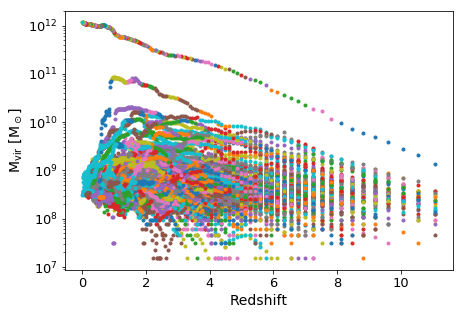

In [7]:
fig = gt.plot_mass_history()

In [ ]:
kwargs = caga.generate_kwargs(gt, 1e7)
assert kwargs["pre_calculate_SSPs"]

OMEGA run in progress..
SYGMA run in progress..
   SYGMA run completed - Run time: 0.1s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
Warning -- Not enough gas to sustain the SFH. 2
   OMEGA run completed - Run time: 3.3s


In [ ]:
# Run GAMMA
kwargs["sfe"] = 0.005
kwargs["print_off"] = True
g = gamma.gamma(**kwargs)

GAMMA run in progress..


In [ ]:
reload(caga); reload(caga.plot); reload(caga.calc); reload(caga.plot.calc); reload(caga.plot.caga);

In [ ]:
fig = caga.plot.metallicity_evolution(g,tree_trunk_ID=gt.tree_trunk_ID)

In [ ]:
fig = caga.plot.sfh_evolution(g,tree_trunk_ID=gt.tree_trunk_ID)

In [ ]:
fig = caga.plot.mstar_evolution(g,reduction_factor=0.7)

In [ ]:
fig, (mdf_x, mdf_y, mdf_gauss_y) = caga.plot.metallicity_distribution(g, sigma_gauss=0.1)
lines = caga.find_distribution_percentile(mdf_x,mdf_gauss_y,[.5-.68/2,.5,.5+.68/2])
plt.vlines(lines,0,np.max(mdf_y),color='k')
mean = caga.find_distribution_mean(mdf_x,mdf_gauss_y)
std = caga.find_distribution_std(mdf_x,mdf_gauss_y)
plt.vlines([mean+_x for _x in [-std, 0, std]],0,np.max(mdf_y),color='c')


In [ ]:
mean